In [1]:
import pandas as pd

C:\Users\fabio\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### POPULISM

In [2]:
labels_df = pd.read_csv("data/annotated_dataset/populism_annotated_data.csv", sep=",", encoding="utf-8")
cleaned_df = pd.read_csv("data/cleaned_dataset/refined.csv", sep=",", encoding="utf-8")
annotated_df = labels_df.merge(cleaned_df, how='left', left_on='id', right_on="ID")
annotated_df["Year"] = annotated_df["Date"].str.split("-").str[0]

In [3]:
annotated_df.head(2)

,id,manichean,peoplecentrism,antielitism,emotional,ID,Date,Term,Subcorpus,Speaker_minister,Speaker_party,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_gender,Speaker_birth,text,text_length,Year
0,ParlaMint-IT_2013-08-01-LEG17-Senato-sed-86.u153,1,1,1,1,ParlaMint-IT_2013-08-01-LEG17-Senato-sed-86.u153,2013-08-01,17 Legislatura,Reference,notMinister,M5S,Movimento 5 Stelle,Opposition,Pigliatutto,PetrocelliVitoRosario,M,1964,"PETROCELLI . Signor Presidente, senatrici e se...",9561,2013
1,ParlaMint-IT_2014-02-05-LEG17-Senato-sed-184.u79,0,1,1,1,ParlaMint-IT_2014-02-05-LEG17-Senato-sed-184.u79,2014-02-05,17 Legislatura,Reference,notMinister,M5S,Movimento 5 Stelle,Opposition,Pigliatutto,EndrizziGiovanni,M,1962,Lo dico al senatore Casson e agli altri: capis...,9793,2014


In [4]:
annotated_df["pop_sum"] = annotated_df["manichean"] + annotated_df["peoplecentrism"] + annotated_df["antielitism"] + + annotated_df["emotional"]

In [5]:
for elem in set(annotated_df["Party_orientation"]):
    print(elem, annotated_df[annotated_df["Party_orientation"]==elem].shape[0])

Centro verso centro-destra 459
Centro 159
Centro-destra 2302
Centro-sinistra 3067
Destra verso estrema destra 2483
Pigliatutto 2370


In [6]:
annotated_df.groupby("Speaker_party").pop_sum.sum()/annotated_df.groupby("Speaker_party").pop_sum.count()

Speaker_party
FI-BP    1.441646
FdI      2.391679
Lega     2.454647
M5S      2.295359
NCD      0.398693
PD       0.681122
PdL      1.176418
SCpI     0.396226
Name: pop_sum, dtype: float64

In [7]:
for feat in ["manichean", "peoplecentrism", "antielitism", "emotional"]:
    print(feat)
    print(annotated_df.groupby("Speaker_party")[feat].sum()/annotated_df.groupby("Speaker_party").pop_sum.count()*100, "\n")

manichean
Speaker_party
FI-BP    24.181360
FdI      54.519369
Lega     51.679731
M5S      48.396624
NCD       6.318083
PD       10.074992
PdL      21.152115
SCpI      3.773585
dtype: float64 

peoplecentrism
Speaker_party
FI-BP    20.486986
FdI      40.602582
Lega     55.599104
M5S      53.797468
NCD       3.267974
PD        6.521030
PdL      15.031503
SCpI      3.144654
dtype: float64 

antielitism
Speaker_party
FI-BP    33.081444
FdI      62.410330
Lega     60.918253
M5S      55.274262
NCD       7.843137
PD        9.096837
PdL      30.783078
SCpI      5.660377
dtype: float64 

emotional
Speaker_party
FI-BP    66.414777
FdI      81.635581
Lega     77.267637
M5S      72.067511
NCD      22.440087
PD       42.419302
PdL      50.675068
SCpI     27.044025
dtype: float64 



<Axes: xlabel='Year'>

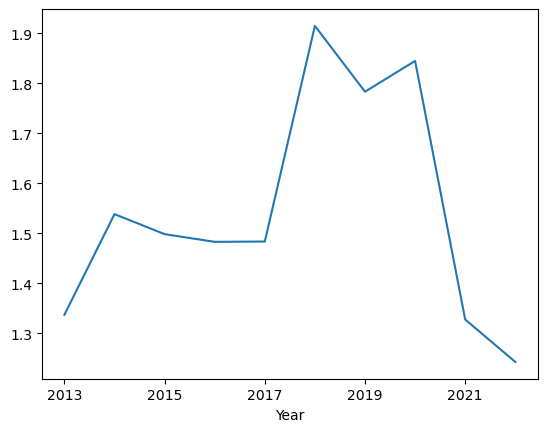

In [8]:
(annotated_df.groupby("Year").pop_sum.sum()/annotated_df.groupby("Year").pop_sum.count()).plot()

### POLARIZATION

In [14]:
labels_df = pd.read_csv("data/annotated_dataset/polarization_annotated_data.csv", sep=",", encoding="utf-8")
cleaned_df = pd.read_csv("data/cleaned_dataset/refined.csv", sep=",", encoding="utf-8")
annotated_pol_df = labels_df.merge(cleaned_df, how='left', left_on='id', right_on="ID")
annotated_pol_df["Year"] = annotated_pol_df["Date"].str.split("-").str[0]

In [15]:
annotated_pol_df.groupby("Speaker_party").polarization.sum()/annotated_pol_df.groupby("Speaker_party").polarization.count()

Speaker_party
FI-BP    1.708648
FdI      1.982783
Lega     1.898656
M5S      0.967511
NCD      1.278867
PD       0.520378
PdL      1.780378
SCpI     1.000000
Name: polarization, dtype: float64

In [16]:
for year in range(2013, 2023):
    print(year)
    print(annotated_pol_df[annotated_pol_df.Year == str(year)].groupby("Speaker_party").polarization.sum()/annotated_pol_df[annotated_pol_df.Year == str(year)].groupby("Speaker_party").polarization.count())
    print()

2013
Speaker_party
Lega    1.924138
M5S     0.942731
NCD     1.541667
PD      0.652330
PdL     1.581395
SCpI    0.975806
Name: polarization, dtype: float64

2014
Speaker_party
Lega    1.956835
M5S     0.997041
NCD     1.357143
PD      0.639241
PdL     1.766038
SCpI    1.085714
Name: polarization, dtype: float64

2015
Speaker_party
Lega    1.952830
M5S     1.010239
NCD     1.269231
PD      0.691837
PdL     1.820408
Name: polarization, dtype: float64

2016
Speaker_party
Lega    1.916667
M5S     0.968889
NCD     1.204545
PD      0.569048
PdL     1.857143
Name: polarization, dtype: float64

2017
Speaker_party
Lega    1.938776
M5S     0.980769
NCD     1.120000
PD      0.581967
PdL     1.894737
Name: polarization, dtype: float64

2018
Speaker_party
FI-BP    1.897143
FdI      2.000000
Lega     1.880342
M5S      1.181159
PD       0.168675
Name: polarization, dtype: float64

2019
Speaker_party
FI-BP    1.846154
FdI      2.000000
Lega     1.874317
M5S      1.018519
PD       0.178125
Name: polari

In [18]:
annotated_df

,id,manichean,peoplecentrism,antielitism,emotional,ID,Date,Term,Subcorpus,Speaker_minister,...,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_gender,Speaker_birth,text,text_length,Year,pop_sum
0,ParlaMint-IT_2013-08-01-LEG17-Senato-sed-86.u153,1,1,1,1,ParlaMint-IT_2013-08-01-LEG17-Senato-sed-86.u153,2013-08-01,17 Legislatura,Reference,notMinister,...,Movimento 5 Stelle,Opposition,Pigliatutto,PetrocelliVitoRosario,M,1964,"PETROCELLI . Signor Presidente, senatrici e se...",9561,2013,4
1,ParlaMint-IT_2014-02-05-LEG17-Senato-sed-184.u79,0,1,1,1,ParlaMint-IT_2014-02-05-LEG17-Senato-sed-184.u79,2014-02-05,17 Legislatura,Reference,notMinister,...,Movimento 5 Stelle,Opposition,Pigliatutto,EndrizziGiovanni,M,1962,Lo dico al senatore Casson e agli altri: capis...,9793,2014,3
2,ParlaMint-IT_2019-03-06-LEG18-Senato-sed-97.u7,1,1,1,1,ParlaMint-IT_2019-03-06-LEG18-Senato-sed-97.u7,2019-03-06,18 Legislatura,Reference,notMinister,...,MoVimento 5 Stelle,Coalition,Pigliatutto,BottoElena,F,1974,"Signor Presidente, onorevoli colleghe e colleg...",5650,2019,4
3,ParlaMint-IT_2013-05-29-LEG17-Senato-sed-30.u44,1,1,1,1,ParlaMint-IT_2013-05-29-LEG17-Senato-sed-30.u44,2013-05-29,17 Legislatura,Reference,notMinister,...,Movimento 5 Stelle,Opposition,Pigliatutto,MorraNicola,M,1963,"Signora Presidente, colleghi tutti, spero di e...",7994,2013,4
4,ParlaMint-IT_2022-06-21-LEG18-Senato-sed-443.u59,0,1,0,1,ParlaMint-IT_2022-06-21-LEG18-Senato-sed-443.u59,2022-06-21,18 Legislatura,"COVID,Guerra",notMinister,...,MoVimento 5 Stelle,Coalition,Pigliatutto,FerraraGianluca,M,1972,"Signor Presidente, il MoVimento 5 Stelle dal 2...",4841,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,ParlaMint-IT_2022-09-13-LEG18-Senato-sed-464.u21,0,0,0,0,ParlaMint-IT_2022-09-13-LEG18-Senato-sed-464.u21,2022-09-13,18 Legislatura,"COVID,Guerra",notMinister,...,Lega-Salvini Premier,-,Destra verso estrema destra,FerreroRoberta,F,1971,"Signor Presidente, onorevoli colleghi, quello ...",4632,2022,0
10836,ParlaMint-IT_2022-09-13-LEG18-Senato-sed-464.u23,1,1,1,1,ParlaMint-IT_2022-09-13-LEG18-Senato-sed-464.u23,2022-09-13,18 Legislatura,"COVID,Guerra",notMinister,...,MoVimento 5 Stelle,Coalition,Pigliatutto,LanziGabriele,M,1957,"Signor Presidente, oggi avrei voluto passare u...",4967,2022,4
10837,ParlaMint-IT_2022-09-13-LEG18-Senato-sed-464.u203,0,0,0,0,ParlaMint-IT_2022-09-13-LEG18-Senato-sed-464.u203,2022-09-13,18 Legislatura,"COVID,Guerra",notMinister,...,Partito Democratico,Coalition,Centro-sinistra,CominciniEugenio,M,1972,"COMINCINI . Signor Presidente, il decreto-legg...",4856,2022,0
10838,ParlaMint-IT_2022-09-20-LEG18-Senato-sed-465.u8,0,0,0,1,ParlaMint-IT_2022-09-20-LEG18-Senato-sed-465.u8,2022-09-20,18 Legislatura,"COVID,Guerra",notMinister,...,Partito Democratico,Coalition,Centro-sinistra,ValenteValeria,F,1976,"VALENTE . Signor Presidente, garantisco che pe...",5142,2022,1


In [30]:
annotated_texts_df = annotated_df.merge(annotated_pol_df, how='left', left_on='id', right_on="ID")
annotated_texts_df = annotated_texts_df[["id_x", "text_x", "pop_sum", "manichean", "peoplecentrism", "antielitism", "emotional", "polarization"]]
annotated_texts_df = annotated_texts_df.rename(columns={"id_x": "id", "text_x": "text"})

In [32]:
annotated_texts_df.head(2)

,id,text,pop_sum,manichean,peoplecentrism,antielitism,emotional,polarization
0,ParlaMint-IT_2013-08-01-LEG17-Senato-sed-86.u153,"PETROCELLI . Signor Presidente, senatrici e se...",4,1,1,1,1,1
1,ParlaMint-IT_2014-02-05-LEG17-Senato-sed-184.u79,Lo dico al senatore Casson e agli altri: capis...,3,0,1,1,1,1


In [33]:
annotated_texts_df.to_csv("data/annotated_dataset/annotated_texts.csv", index=False)